In [179]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model

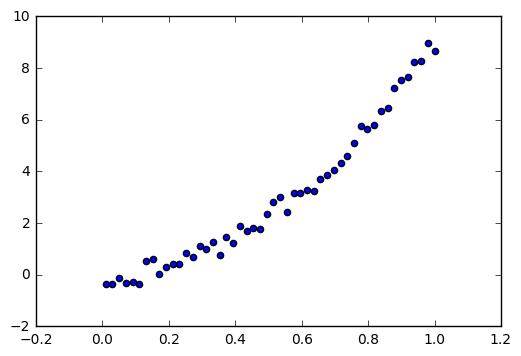

In [156]:
n = 50
x = np.linspace(0.01, 1, n).reshape(-1, 1)
y = np.linspace(0.01, 3, n) * np.linspace(0.01, 3, n) + np.random.rand(n) - .5


plt.scatter(x,y)

## Linear Regression - no regularization

In [182]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([ 9.20431188]), -1.6162894696263419)

## Linear "Ridge" Regression - L2 regularization

In [191]:
ridge = linear_model.Ridge(alpha=.5)

ridge.fit(x, y)

ridge.coef_, ridge.intercept_

(array([ 8.2355254]), -1.1270522946143449)

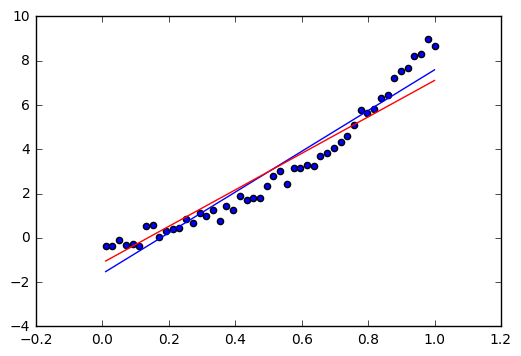

In [192]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='b')
plt.plot(x, x*ridge.coef_ + ridge.intercept_, c='r')

Clearly Linear 1 degree (y = m x) don't fix very well

## Let's try $x^{15}$ polynomial!

In [193]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=15)

x_15 = poly.fit_transform(x.reshape(-1, 1))

In [195]:
linear = linear_model.LinearRegression()

linear.fit(x_15, y)

(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,   2.66094138e+01,  -3.63657606e+02,
         -1.21354976e+04,   4.20362819e+05,  -5.45158028e+06,
          4.01533580e+07,  -1.90232313e+08,   6.14334301e+08,
         -1.39222319e+09,   2.23854829e+09,  -2.54240153e+09,
          1.99467812e+09,  -1.02877154e+09,   3.13892709e+08,
         -4.29345055e+07]), -0.61687863157174272)

In [196]:
ridge = linear_model.Ridge()

ridge.fit(x_15, y)

(ridge.coef_, ridge.intercept_)

(array([ 0.        ,  2.58818156,  2.17137506,  1.63672893,  1.2084904 ,
         0.88192547,  0.63153582,  0.43631891,  0.28137646,  0.15639051,
         0.0541509 , -0.03048053, -0.10124784, -0.16093888, -0.21167048,
        -0.25507765]), 0.0076888178296514731)

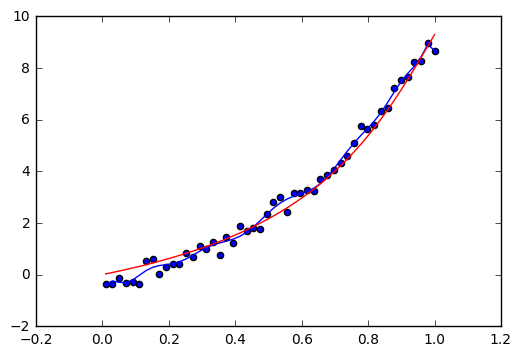

In [197]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

We can see that the non-ridge model fits points very well. But how does it fare for new points?

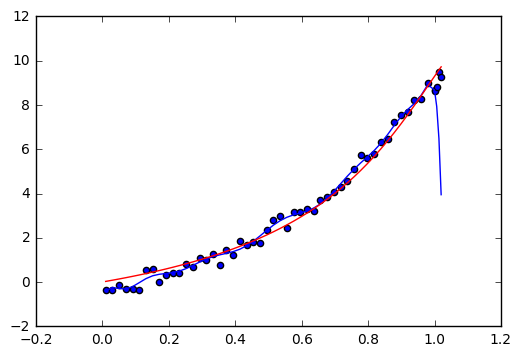

In [198]:
m = 4
x_final = 1.02
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

Clearly, the new predictions are not so great.

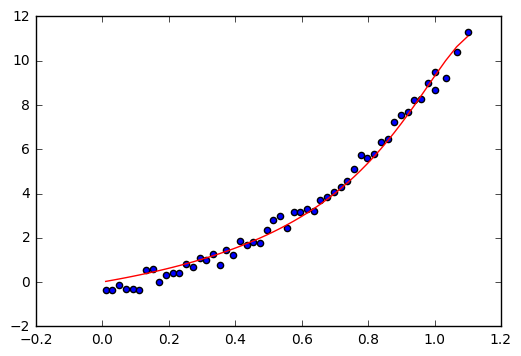

In [173]:
m = 4
x_final = 1.1
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

The Ridge model fares better for new values. 

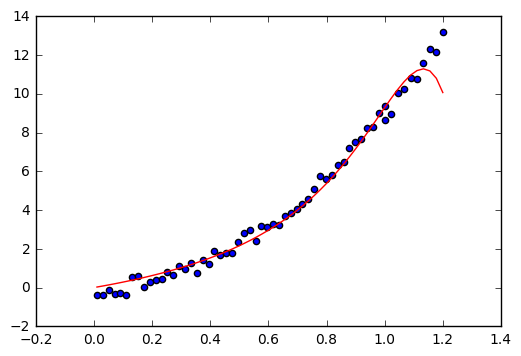

In [174]:
m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_15 = poly.fit_transform(x2)
y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


plt.scatter(x2,y2)
# plt.plot(x2, np.dot(x_15, linear.coef_) + linear.intercept_, c='b')
plt.plot(x2, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='r')

But not all new values

## Back to $x^2$ degree model 

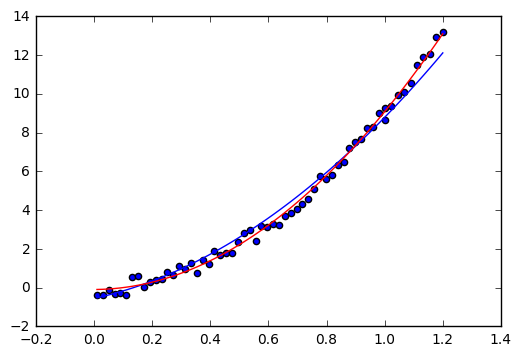

In [178]:
poly2 = PolynomialFeatures(degree=2)

m = 10
x_final = 1.2
x2 = np.concatenate([x, np.linspace(1, x_final, m).reshape(-1, 1)])
x_poly = poly2.fit_transform(x2)

y2 = np.concatenate([y, np.linspace(3, 3*x_final, m) * np.linspace(3, 3*x_final, m) + np.random.rand(m) - .5])


ridge = linear_model.Ridge()
ridge.fit(x_poly, y2)

model = linear_model.LinearRegression()
model.fit(x_poly, y2)

plt.scatter(x2,y2)
plt.plot(x2, np.dot(x_poly, ridge.coef_) + ridge.intercept_, c='b')
plt.plot(x2, np.dot(x_poly, model.coef_) + model.intercept_, c='r')